**Example**

Develop a model to predict the non payment of overdrafts by customers of a multinational banking institution. The data collected is given in Logistic_Reg.csv file.

In [1]:
#Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
#Import the dataset
data= pd.read_csv('Logistic_Reg.csv')

In [4]:
#Explore the data
data.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
0,6.2,9.3,7.4,1
1,2.6,2.2,8.7,1
2,9.5,1.5,8.2,1
3,2.6,5.0,0.4,0
4,10.0,7.7,7.2,1


In [5]:
#Check the dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ind_Exp_Act_Score  980 non-null    float64
 1   Tran_Speed_Score   980 non-null    float64
 2   Peer_Comb_Score    980 non-null    float64
 3   Outcome            980 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 30.8 KB


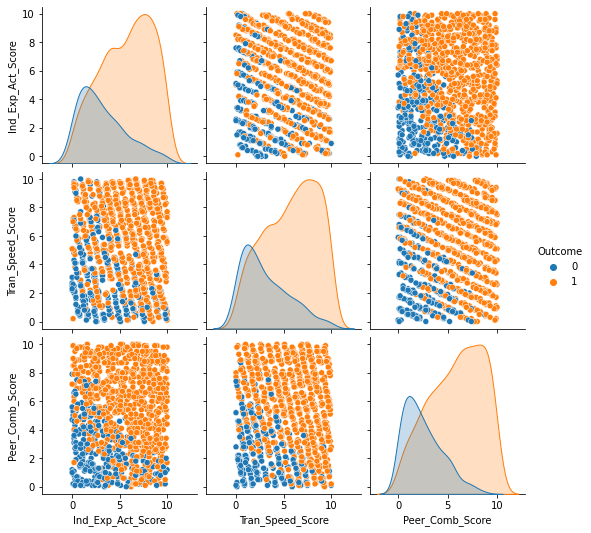

In [6]:
#Preliminary analysis
sns.pairplot(mydata, hue='Outcome')
plt.show()

In [7]:
#Separate x's and y
x = data.iloc[:,0:3]
y = data.iloc[:,3]

In [8]:
#Develop the model
model = LogisticRegression(C=1e8)

**Regularization**

Regularization is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error.” In other words: regularization can be used to train models that generalize better on unseen data, by preventing the algorithm from overfitting the training dataset

C : float, default=1.0\
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

In [9]:
#Fit the model to data
model = model.fit(X=x,y=y)

In [10]:
#Model intercept
model.intercept_

array([-35.50615344])

In [11]:
#Model coefficients
model.coef_

array([[2.7957264 , 2.75315703, 3.51531432]])

In [12]:
#Model accuaracy
accuracy = model.score(X=x,y=y)
round(accuracy,4)

0.9714

In [14]:
#Predicted values
pred = model.predict(X=x)

In [15]:
#Actual vs Predicted
table = pd.crosstab(index=y,columns=pred)

In [16]:
table

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [17]:
#Making predicted values as dataframe
pred = pd.DataFrame(data=pred,columns=['Predicted Class'])

In [18]:
#Predicted probabilities
predprob = model.predict_proba(X=x)

In [19]:
#Check predicted probability
predprob

array([[2.88657986e-15, 1.00000000e+00],
       [2.24162471e-04, 9.99775838e-01],
       [3.74296150e-11, 1.00000000e+00],
       ...,
       [9.99596344e-01, 4.03655902e-04],
       [9.99901849e-01, 9.81512294e-05],
       [9.24387621e-01, 7.56123794e-02]])

In this array each list contains 

[probability of 0, probability of 1]


In [20]:
#Making Predicted probabilities to dataframe
predprob = pd.DataFrame(data=predprob,columns=['Predicted 0', 'Predicted 1'])
predprob

,Predicted 0,Predicted 1
0,2.886580e-15,1.000000
1,2.241625e-04,0.999776
2,3.742961e-11,1.000000
3,9.999979e-01,0.000002
4,0.000000e+00,1.000000
...,...,...
975,9.531891e-01,0.046811
976,1.554312e-15,1.000000
977,9.995963e-01,0.000404
978,9.999018e-01,0.000098


In [21]:
#Combine predicted values to result
result = data.join(pred)
result = result.join(predprob)

In [23]:
#Show myresult
result.head()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome,Predicted Class,Predicted 0,Predicted 1
0,6.2,9.3,7.4,1,1,2.886580e-15,1.000000
1,2.6,2.2,8.7,1,1,2.241625e-04,0.999776
2,9.5,1.5,8.2,1,1,3.742961e-11,1.000000
3,2.6,5.0,0.4,0,0,9.999979e-01,0.000002
4,10.0,7.7,7.2,1,1,0.000000e+00,1.000000


Probability of Predicted 0 or Predicted 1, which ever is highest will be the predicted class.

**Model Generalizability**

In [25]:
#Cross validation
score = cross_val_score(estimator= model,X=x,y=y,cv=5, scoring='accuracy')

In [26]:
cv_accuracy = score.mean()

In [27]:
cv_accuracy

0.9673469387755101

We find that cross validation model accuracy has decreased.

| | Predicted Count | |
| ----------- | ----------- |----------- |
| Actual Count | Negative (0) |Positive (1) |
| Negative (0) | True Negative |False Positive |
| Positive (1)| False Negative |True Positive |

**Sensitivity or Recall**

Sensitivity = TP/ (TP +FN)

**Specificity**

Specificity = TN/(TN+FP)

**Precision**

Precision = TP/(TP+FP)

**F Measure** 

F Measure = Harmonic Mean of Precision and Recall

In [28]:
# Contingency table
table

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [29]:
TP = 695
TN = 257
FP = 14
FN = 14

In [30]:
#Sensitivity or Recall
Sensitivity = TP/(TP+FN)
round(Sensitivity,3)

0.98

In [31]:
#Precision
Precision = TP/(TP+FP)
round(Precision,3)

0.98

In [32]:
#Specificity
Specificity = TN/(TN+FP)
round(Specificity,3)

0.948